# Introduction

Test train neural nets with selection of dataset based on calculated FQA Score

# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

from tqdm.notebook import tqdm_notebook

import matplotlib.pyplot as plt

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts    
    
from fqa.fqa_analyzer import FQAAnalyzer

from data_loaders.dl_list import ALL_DATA_LOADERS_LIST

from models.oface_mouth_model import OpenfaceMouth

from tagger.tagger import Tagger

# Joining Labels and FQA Score

In [3]:
fqa_anlz = FQAAnalyzer(aligned=True)
fqa_anlz.load_fqa_scores()
fqa_scores_df = fqa_anlz.fqa_scores_df

print(fqa_scores_df.shape)

fqa_scores_df.head()

(233469, 2)


,img_name,fqa_score
0,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.261643
1,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.341480
2,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.390947
3,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.385531
4,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.341721


In [4]:
m = OpenfaceMouth()
t = Tagger(None, m, cts.ICAO_REQ.MOUTH)

labels_df = pd.DataFrame()

for dl in tqdm_notebook(ALL_DATA_LOADERS_LIST):
    t.set_dataloader(dl)
    t.load_labels_df()
    
    if dl.is_aligned():
        labels_df = labels_df.append(t.get_labels_df())
            
print(labels_df.shape)

labels_df.head()


(233469, 2)


,img_name,comp
0,/home/guilherme/data/Dropbox/Link to Desktop/D...,1.0
1,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.0
2,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.0
3,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.0
4,/home/guilherme/data/Dropbox/Link to Desktop/D...,1.0


In [5]:
labels_fqa_df = pd.DataFrame()
labels_fqa_df['img_name'] = labels_df.img_name
labels_fqa_df['fqa_score'] = fqa_scores_df.fqa_score
labels_fqa_df['comp'] = labels_df.comp

labels_fqa_df.head()

,img_name,fqa_score,comp
0,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.261643,1.0
1,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.341480,0.0
2,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.390947,0.0
3,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.385531,0.0
4,/home/guilherme/data/Dropbox/Link to Desktop/D...,0.341721,1.0


# QQ-Plot Normality Test

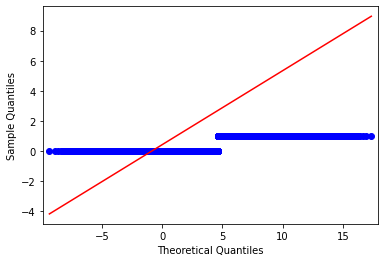

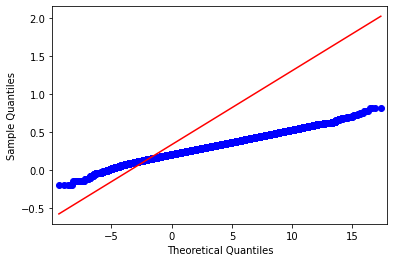

In [6]:
import statsmodels.api as sm
import pylab

sm.qqplot(labels_fqa_df.comp, loc = 4, scale = 3, line='s')
sm.qqplot(labels_fqa_df.fqa_score, loc = 4, scale = 3, line='s')

pylab.show()

## Histogram FQA Score

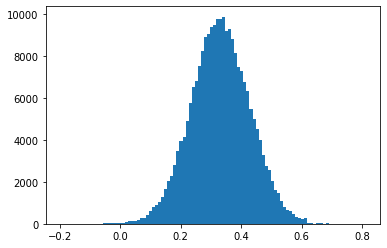

In [7]:
plt.hist(labels_fqa_df.fqa_score, bins=100)
plt.show()

# Save Data

In [8]:
labels_fqa_df.to_csv(cts.LABELS_FQA_SCORES_DATA_PATH, index=False)